In [209]:
from sklearn.model_selection import train_test_split
import cv2
import os
import glob
import numpy as np
# from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import joblib
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

WORKPATH = "C:/Users/Johan/Documents/PycharmProjects/MaplestoryM-Assistant"
os.chdir(WORKPATH)

In [125]:
# target_size = (60, 65)
#
# def read_and_resize(path, target_size):
#     return cv2.resize(cv2.imread(path), target_size)/255

In [167]:
# # # Execute Once
# AutoBattleStatusRawList = glob.glob("./raw_data/US/Status/raw_data/AutoBattle/*.png")
# AutoQuestStatusRawList = glob.glob("./raw_data/US/Status/raw_data/AutoQuest/*.png")
#
# for i in range(len(AutoBattleStatusRawList)):
#     img = cv2.imread(AutoBattleStatusRawList[i])
#     img = img[625:685, 390:455]
#     img = cv2.resize(img, target_size)
#     cv2.imwrite("./raw_data/US/Status/data/AutoBattle/"+str(i)+".png", img)
#
# for i in range(len(AutoQuestStatusRawList)):
#     img = cv2.imread(AutoQuestStatusRawList[i])
#     img = img[625:685, 390:455]
#     img = cv2.resize(img, target_size)
#     cv2.imwrite("./raw_data/US/Status/data/AutoQuest/"+str(i)+".png", img)

In [168]:
img_path_list = glob.glob("./raw_data/US/status/data/*/*.*", recursive=True)
print(f"Data Size: {len(img_path_list)}")
img_cls = [os.path.basename(os.path.dirname(i)) for i in img_path_list]
classes = list(np.unique(img_cls))
Y = np.zeros((len(img_cls), len(classes)))

for r in range(len(img_cls)):
    Y[r, classes.index(img_cls[r])] = 1

X_img = []
for i in img_path_list:
    img = cv2.imread(i, 0)
    X_img.append(img)
X_img = np.array(X_img)
X_img = X_img.reshape(len(X_img), -1)
print(X_img.shape)

Data Size: 485
(485, 3900)


In [185]:
X_train, X_test, y_train, y_test = train_test_split(X_img, img_cls, stratify=img_cls, test_size=0.3, random_state=3)
print(len(X_train), len(X_test), len(y_train), len(y_test))

339 146 339 146


In [186]:
AutoQuestNum = 0
AutoBattleNum = 0
for y_train_item in y_train:
    if y_train_item == "AutoQuest":
        AutoQuestNum += 1
    else:
        AutoBattleNum+=1
print(AutoQuestNum, AutoBattleNum)

AutoQuestNum = 0
AutoBattleNum = 0
for y_test_item in y_test:
    if y_test_item == "AutoQuest":
        AutoQuestNum += 1
    else:
        AutoBattleNum+=1
print(AutoQuestNum, AutoBattleNum)

280 59
121 25


In [213]:
from sklearn.svm import SVC

# model = xgb.XGBClassifier()
model = GradientBoostingClassifier()
# model = SVC()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [215]:
model.score(X_test, y_test)

1.0

In [216]:
model.predict(X_test)

array(['AutoQuest', 'AutoQuest', 'AutoQuest', 'AutoBattle', 'AutoQuest',
       'AutoQuest', 'AutoQuest', 'AutoQuest', 'AutoQuest', 'AutoQuest',
       'AutoQuest', 'AutoQuest', 'AutoBattle', 'AutoQuest', 'AutoQuest',
       'AutoQuest', 'AutoQuest', 'AutoBattle', 'AutoQuest', 'AutoQuest',
       'AutoQuest', 'AutoQuest', 'AutoBattle', 'AutoBattle', 'AutoBattle',
       'AutoQuest', 'AutoBattle', 'AutoQuest', 'AutoBattle', 'AutoQuest',
       'AutoQuest', 'AutoQuest', 'AutoQuest', 'AutoQuest', 'AutoQuest',
       'AutoBattle', 'AutoQuest', 'AutoQuest', 'AutoQuest', 'AutoQuest',
       'AutoQuest', 'AutoQuest', 'AutoQuest', 'AutoQuest', 'AutoQuest',
       'AutoQuest', 'AutoQuest', 'AutoQuest', 'AutoQuest', 'AutoQuest',
       'AutoQuest', 'AutoQuest', 'AutoQuest', 'AutoQuest', 'AutoQuest',
       'AutoQuest', 'AutoBattle', 'AutoQuest', 'AutoQuest', 'AutoQuest',
       'AutoQuest', 'AutoQuest', 'AutoQuest', 'AutoQuest', 'AutoQuest',
       'AutoQuest', 'AutoQuest', 'AutoBattle', 'AutoQu

C:\Users\Johan\anaconda3\envs\maplestory\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


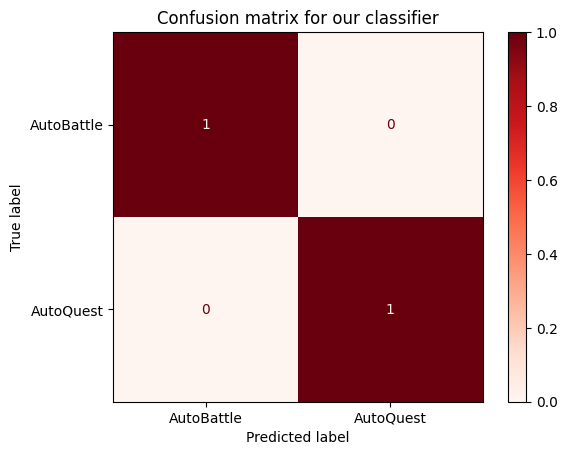

In [217]:
matrix = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Reds,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [218]:
# y_test_int = []
# for item in y_test:
#     if item == "AutoQuest":
#         y_test_int.append(0)
#     else:
#         y_test_int.append(1)
# # Get support vectors
# support_vectors = model.support_vectors_
# # Visualize support vectors
# plt.scatter(X_train[:,0], X_train[:,1])
# plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
# plt.title('Linearly separable data with support vectors')
# plt.xlabel('X1')
# plt.ylabel('X2')
# plt.show()
# # Plot decision boundary
# plot_decision_regions(X_test, np.array(y_test_int), clf=model, legend=2)
# plt.show()

In [219]:
joblib.dump(model, "./output/ckpt/status-predictor.pkl")

['./output/ckpt/status-predictor.pkl']